In [ ]:
"""
6) Treine um modelo de Gradient Boosting no conjunto de dados Breast Cancer.
Compare o desempenho utilizando a métrica ROC-AUC e a curva ROC
"""

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
# Carregando o dataset com os dados do arquivo csv.
breast_cancer_dataset = pd.read_csv('../data/Breast_cancer_data.csv', encoding='utf-8')

In [ ]:
# Separando as features e a classe para o modelo:
features, classe = breast_cancer_dataset.drop(['diagnosis'], axis=1), breast_cancer_dataset['diagnosis']

In [ ]:
# Separando os conjuntos de dados para treinamento e validação:
features_treino, features_validacao, classe_treino, classe_validacao = train_test_split(features, classe, test_size=0.30)

In [ ]:
# Treinando o modelo GradientBoosting:
modelo_GB = GradientBoostingClassifier()
modelo_GB.fit(features_treino, classe_treino)

GradientBoostingClassifier()

In [ ]:
# Fazendo a predição com o conjunto de dados de validação:
classe_predicao = modelo_GB.predict(features_validacao)

In [ ]:
# Calculando o ROC AUC:
roc_auc = roc_auc_score(classe_validacao, classe_predicao)
print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.8691


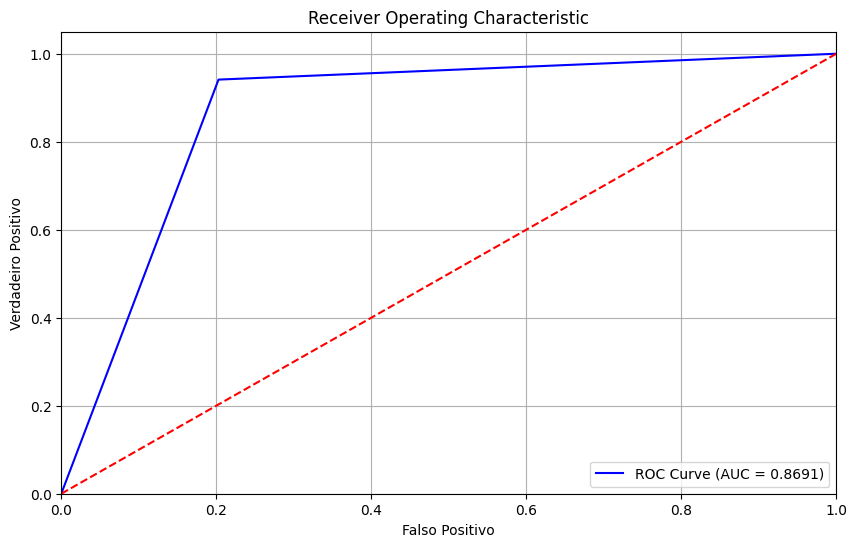

In [ ]:
# Criando o gráfico da curva de ROC:
fpr, tpr, thresholds = roc_curve(classe_validacao, classe_predicao)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()